## 대한민국 (South Korea) 관련 데이터 분석

*표본이 적어 분석의 신뢰성이 부족함

In [13]:
import pandas as pd

df_2019 = pd.read_csv("datasets/2019.csv", sep=",")
print(f"2019: {df_2019.columns.tolist()}\n")

df_2018 = pd.read_csv("datasets/2018.csv", sep=",")
print(f"2018: {df_2018.columns.tolist()}\n")

df_2017 = pd.read_csv("datasets/2017.csv", sep=",")
print(f"2017: {df_2017.columns.tolist()}\n")

df_2016 = pd.read_csv("datasets/2016.csv", sep=",")
print(f"2016: {df_2016.columns.tolist()}\n")

df_2015 = pd.read_csv("datasets/2015.csv", sep=",")
print(f"2015: {df_2015.columns.tolist()}")

2019: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

2018: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

2017: ['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']

2016: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

2015: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Fam

---

- Country: South Korea  
- Features: Score, Economy, Health, Freedom

In [14]:
def find_column(df, to_contain):
    mask = df.columns.str.contains(to_contain)
    col_name = df.columns[mask].values[0]
    return col_name

def get_kor_values(df):
    country = find_column(df, "Country")
    score = find_column(df, "Score")
    gdp = find_column(df, "GDP")
    health = find_column(df, "Health")
    freedom = find_column(df, "Freedom")
    df_kor = df.loc[df[country] == "South Korea", [score, gdp, health, freedom]]
    values = df_kor.values.flatten().tolist()
    return values

In [15]:
kor_2019 = get_kor_values(df_2019)
kor_2018 = get_kor_values(df_2018)
kor_2017 = get_kor_values(df_2017)
kor_2016 = get_kor_values(df_2016)
kor_2015 = get_kor_values(df_2015)

In [16]:
values = [kor_2015, kor_2016, kor_2017, kor_2018, kor_2019]
index_names = [str(n) for n in range(2015, 2020)]

df_kor = pd.DataFrame(values, index=index_names)
df_kor.columns = ["Score", "Economy", "Health", "Freedom"]
df_kor

,Score,Economy,Health,Freedom
2015,5.984,1.244610,0.965380,0.332080
2016,5.835,1.359480,0.886450,0.251680
2017,5.838,1.401678,0.900214,0.257922
2018,5.875,1.266000,0.955000,0.244000
2019,5.895,1.301000,1.036000,0.159000


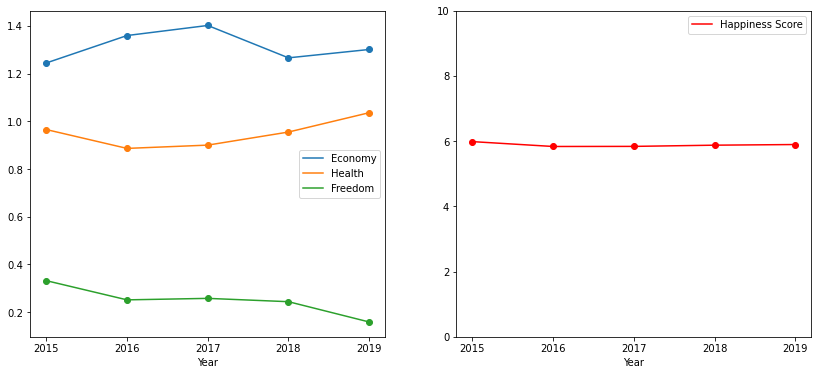

In [17]:
import matplotlib.pyplot as plt

years = df_kor.index
cols = df_kor.columns

plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace=0.2)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

for col in cols[1:]:
    value = df_kor[col].values.flatten().tolist()
    ax1.scatter(years, value)
    ax1.plot(years, value, label=col)
ax1.set_xlabel("Year")
ax1.legend()

scores = df_kor["Score"].values.flatten().tolist()
ax2.scatter(years, scores, color="r")
ax2.plot(years, scores, label="Happiness Score", color="r")
ax2.set_ylim([0, 10])
ax2.set_xlabel("Year")
ax2.legend()

plt.show()

In [59]:
df_korea = pd.read_csv("datasets/worldbank_kor.csv", sep=",")
df_korea.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,"Korea, Rep.",KOR,Battle-related deaths (number of people),VC.BTL.DETH,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Korea, Rep.",KOR,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.R1.ZS,0.315457,NaN,1.270417,6.235566,8.848797,12.77713,...,34.880757,36.822476,36.124804,37.494737,37.974734,40.791757,41.805095,41.055436,NaN,NaN
2,"Korea, Rep.",KOR,Travel services (% of commercial service imports),TM.VAL.TRVL.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,19.251227,19.937905,20.317287,22.809795,24.596294,25.403297,26.713672,25.396862,15.400364,NaN


In [19]:
mask = df_korea["Indicator Name"].str.contains("GDP per capita")
col_gdp = df_korea.loc[mask, "Indicator Name"]

print(*col_gdp.values, sep="\n")

GDP per capita (current LCU)
GDP per capita growth (annual %)
Government expenditure per student, primary (% of GDP per capita)
GDP per capita (constant LCU)
Government expenditure per student, tertiary (% of GDP per capita)
Government expenditure per student, secondary (% of GDP per capita)
GDP per capita, PPP (constant 2017 international $)
GDP per capita (constant 2015 US$)
GDP per capita, PPP (current international $)
GDP per capita (current US$)


In [20]:
import numpy as np

years = df_korea.columns[4:-1]

mask = df_korea["Indicator Name"] == "GDP per capita (current US$)"
kor_gdp = df_korea.loc[mask, :].values.flatten().tolist()
kor_gdp = np.array(kor_gdp[4:-1])

print(*zip(years, kor_gdp))

('1960', 158.249303269821) ('1961', 93.8286490466039) ('1962', 106.148505720006) ('1963', 146.314341932979) ('1964', 123.603494825331) ('1965', 108.722131222718) ('1966', 133.474848530354) ('1967', 161.159931018546) ('1968', 198.431298008386) ('1969', 243.422412925948) ('1970', 279.304968942819) ('1971', 301.176567717333) ('1972', 324.196276804765) ('1973', 406.898830134849) ('1974', 563.355957816833) ('1975', 617.456061933567) ('1976', 834.134207951691) ('1977', 1055.8800411599) ('1978', 1405.82237444554) ('1979', 1783.62231287847) ('1980', 1715.42945990136) ('1981', 1883.4512785111) ('1982', 1992.52822470637) ('1983', 2198.93447182242) ('1984', 2413.26392539765) ('1985', 2482.39995573606) ('1986', 2834.90384756925) ('1987', 3554.59520559057) ('1988', 4748.62960780671) ('1989', 5817.02918132136) ('1990', 6610.0365083067) ('1991', 7636.98242937015) ('1992', 8126.67038993422) ('1993', 8884.92831945455) ('1994', 10385.3361681219) ('1995', 12564.7781344586) ('1996', 13403.049586225) ('199

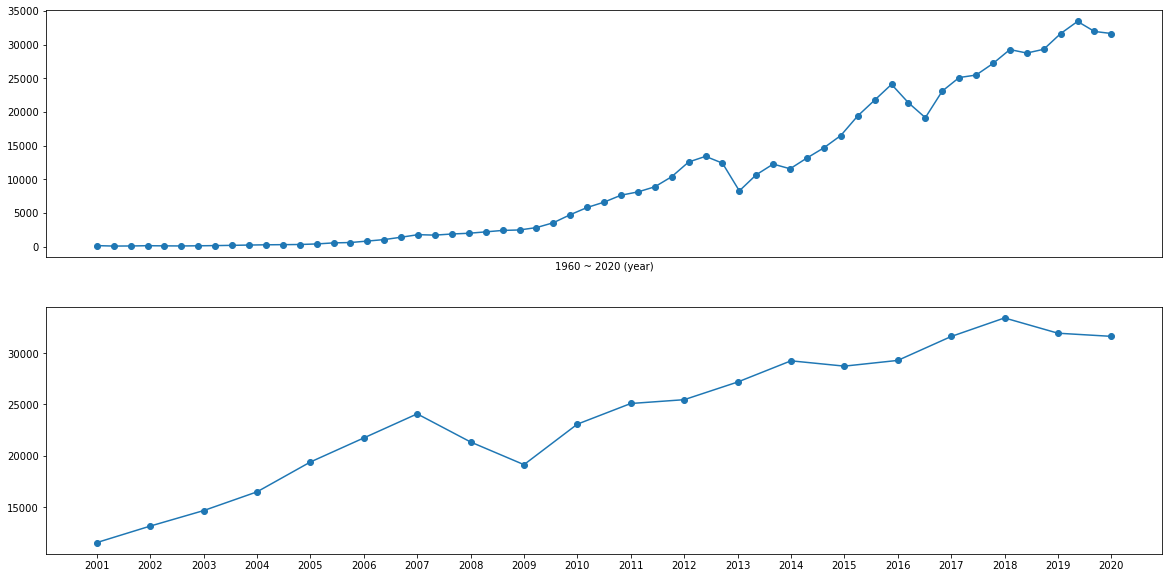

In [58]:
plt.figure(figsize=(20, 10))
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

ax1.scatter(years, kor_gdp)
ax1.plot(years, kor_gdp)
ax1.set_xticks([])
ax1.set_xlabel("1960 ~ 2020 (year)")

ax2.scatter(years[-20:], kor_gdp[-20:])
ax2.plot(years[-20:], kor_gdp[-20:])

plt.show()

In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

years_ = np.array(years).reshape(-1, 1).astype(np.int_)
years_2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(years_)
years_3 = PolynomialFeatures(degree=3, include_bias=False).fit_transform(years_)

model_2 = LinearRegression()
model_2.fit(years_2, kor_gdp)

model_3 = LinearRegression()
model_3.fit(years_3, kor_gdp)

score_2 = model_2.score(years_2, kor_gdp)
score_3 = model_3.score(years_3, kor_gdp)
print(f"score 2: {score_2:.6f} \nscore 3: {score_3:.6f}")

score 2: 0.982928 
score 3: 0.983315


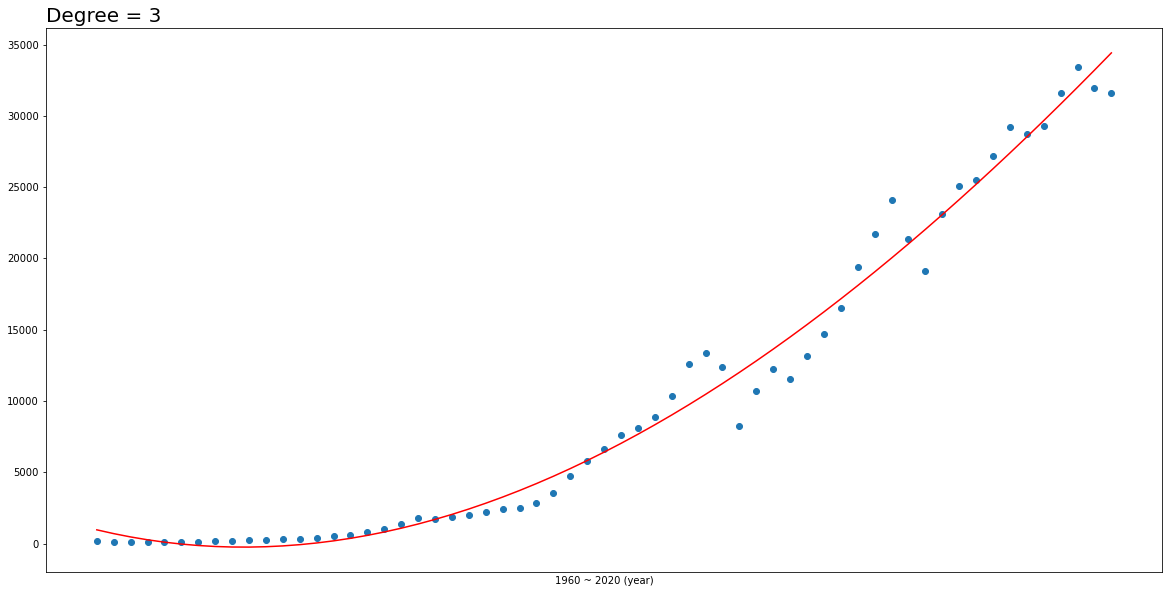

In [56]:
predicted = model_3.predict(years_3)

plt.figure(figsize=(20, 10))
plt.scatter(years, kor_gdp)
plt.plot(years, predicted, color="r")
plt.title("Degree = 3", loc="left", fontsize=20)
plt.xticks([])
plt.xlabel("1960 ~ 2020 (year)")
plt.show()

In [ ]:
# Regression 대신 패턴 추출

In [46]:
"""
import statsmodels.api as sm

kor_gdp_ = pd.Series(kor_gdp.flatten())
years_ = pd.Series(years.values.astype(np.int_).flatten().tolist())
years_ = sm.add_constant(years_)

model = sm.OLS(kor_gdp_, years_)
trained_model = model.fit()
trained_model.summary()

predicted_gdp = trained_model.predict(years_)

plt.figure(figsize=(12, 6))
plt.scatter(years, kor_gdp)
plt.plot(years, predicted_gdp)
plt.show()
"""

'\nimport statsmodels.api as sm\n\nkor_gdp_ = pd.Series(kor_gdp.flatten())\nyears_ = pd.Series(years.values.astype(np.int_).flatten().tolist())\nyears_ = sm.add_constant(years_)\n\nmodel = sm.OLS(kor_gdp_, years_)\ntrained_model = model.fit()\ntrained_model.summary()\n\npredicted_gdp = trained_model.predict(years_)\n\nplt.figure(figsize=(12, 6))\nplt.scatter(years, kor_gdp)\nplt.plot(years, predicted_gdp)\nplt.show()\n'